In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import pathlib

In [2]:
output_dir = '../results_Mar4/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [2]:
# adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
# traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
# traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')
# with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)
# X_phate = scaler.transform(adata.obsm['X_phate'])
# traj_A_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy')
# traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_T.npy')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
gt_esrra = pd.read_csv(f'{output_dir}/esrra.csv', header=None)
gt_zeb1 = pd.read_csv(f'{output_dir}/zeb1.csv', header=None)
gt_cdh1 = pd.read_csv(f'{output_dir}/cdh1.csv', header=None)
mean_dict = {}
upper_dict = {}
lower_dict = {}
for gt_df, gene_name in zip([gt_esrra, gt_zeb1, gt_cdh1], ['ESRRA', 'ZEB1', 'CDH1']):
    mean_traj = gt_df.loc[gt_df[3] == gt_df[3][0], 1].values
    upper_traj = gt_df.loc[gt_df[3] == gt_df[3][1], 1].values
    lower_traj = gt_df.loc[gt_df[3] == gt_df[3][2], 1].values
    mean_dict[gene_name] = mean_traj
    upper_dict[gene_name] = upper_traj
    lower_dict[gene_name] = lower_traj

gene_names = ['ESRRA', 'ZEB1', 'CDH1']

In [39]:
mean_dict

{'ESRRA': array([0.46924429, 0.59050967, 0.2056239 , 0.12302285]),
 'ZEB1': array([0.63455357, 0.38113228, 0.24606135, 0.22584127]),
 'CDH1': array([0.21060713, 0.29242011, 0.49698623, 0.65073576])}

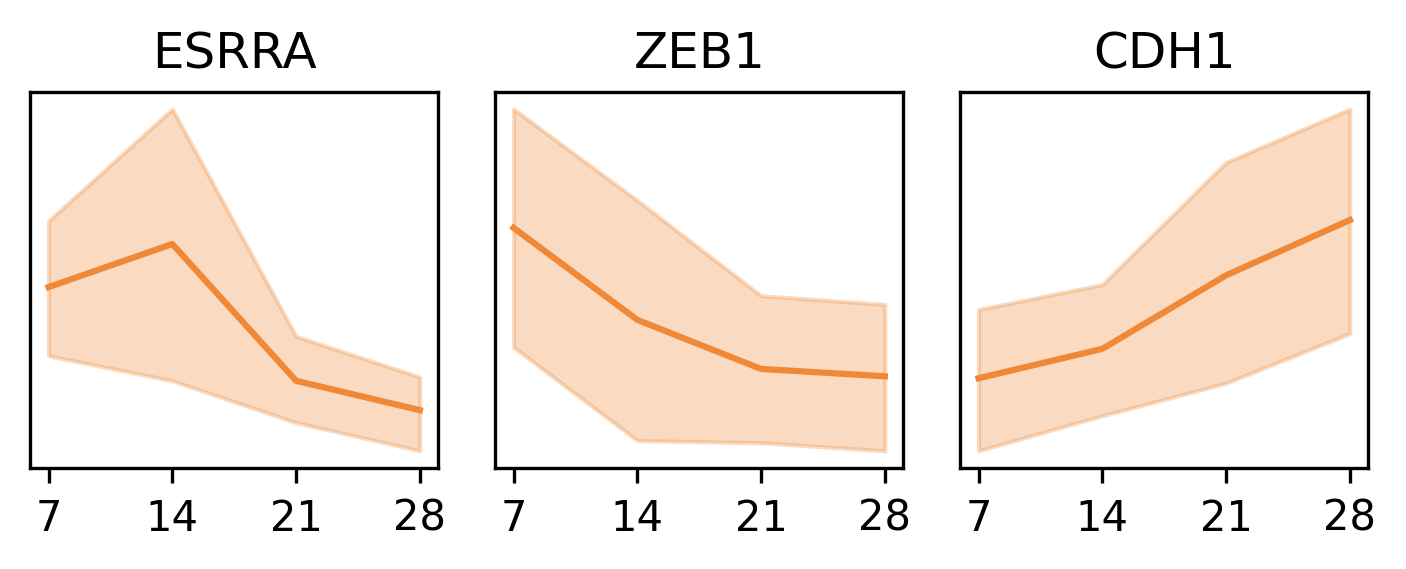

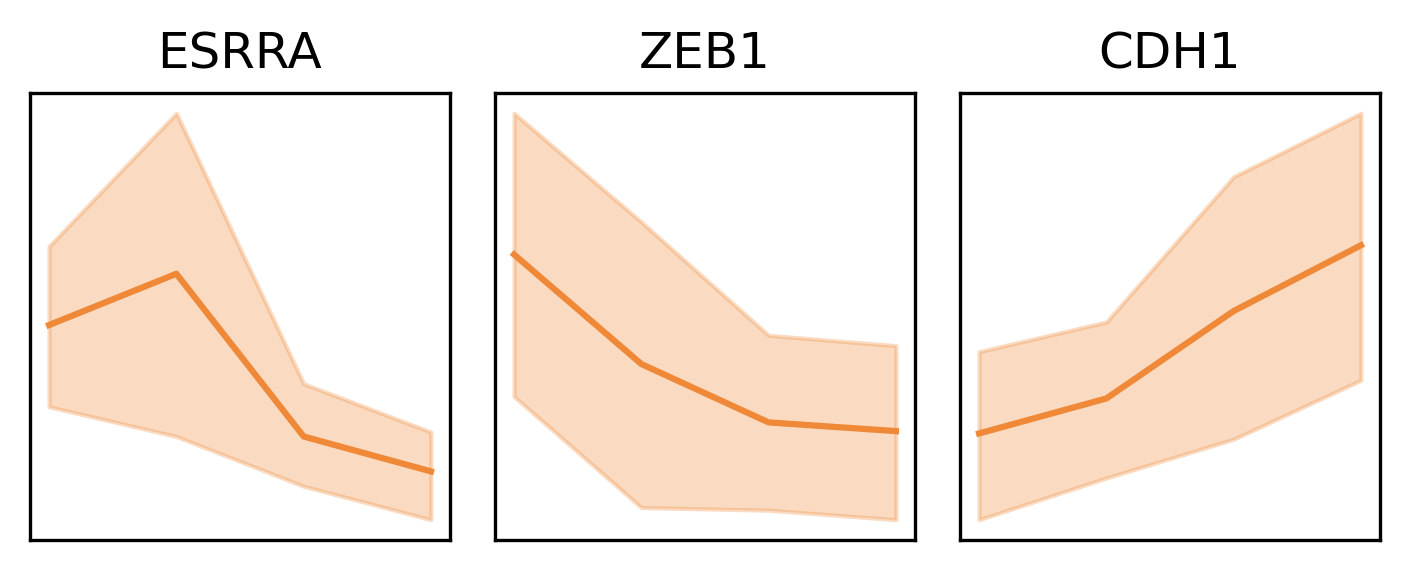

In [47]:

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(mean_dict[gene], color='#ef8938', label='Tumor-forming')
    ax.fill_between(range(mean_dict[gene].shape[0]), lower_dict[gene], upper_dict[gene], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels([7, 14, 21, 28])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{output_dir}/validation_tumor_ground_truth_no_ticks.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(mean_dict[gene], color='#ef8938', label='Tumor-forming')
    ax.fill_between(range(mean_dict[gene].shape[0]), lower_dict[gene], upper_dict[gene], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{output_dir}/validation_tumor_ground_truth.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

